## Assignment 4

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D

In class on Wednesday, March 26 we trained two neural networks models for classifying fashion MNIST.
We'll call them **Model A** and **Model B**.

In [2]:
# Model A
modelA = Sequential([Input((28, 28)),
                    Flatten(),
                    Dense(256, activation="relu"),
                    Dropout(0.2),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")])
modelA.summary()
modelA.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [5]:
# Model B
modelB = Sequential()
modelB.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1))) # zero-padding
modelB.add(MaxPooling2D(2))
modelB.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modelB.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modelB.add(MaxPooling2D(2))
modelB.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modelB.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modelB.add(MaxPooling2D(2))
modelB.add(Flatten())
modelB.add(Dense(128, activation="relu"))
modelB.add(Dropout(0.5))
modelB.add(Dense(64, activation="relu"))
modelB.add(Dropout(0.5))
modelB.add(Dense(10, activation="softmax"))
modelB.summary()
modelB.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

### 1.

**Train** each model for 20 epochs, just like we did in class and then **save** the models. (See [the docs](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) or page 314 of G&eacute;ron.)

In [0]:
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

In [4]:
# Training modelA

fashion_mnist = keras.datasets.fashion_mnist
(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()
CLASSES = "T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot".split(",");

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_tr = (X_tr/255.).astype(np.float32)
Y_tr = np.zeros((60000, 10)).astype(np.float32)
Y_tr[np.arange(60000), y_tr] = 1

X_te = (X_te/255.).astype(np.float32)
Y_te = np.zeros((10000, 10)).astype(np.float32)
Y_te[np.arange(10000), y_te] = 1

In [6]:
modelA.fit(X_tr, Y_tr, epochs=20, batch_size=32, validation_data=(X_te, Y_te))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8671 - accuracy: 0.6941 - val_loss: 0.5498 - val_accuracy: 0.8121
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5519 - accuracy: 0.8088 - val_loss: 0.4808 - val_accuracy: 0.8298
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8300 - val_loss: 0.4483 - val_accuracy: 0.8412
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4498 - accuracy: 0.8414 - val_loss: 0.4190 - val_accuracy: 0.8493
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8511 - val_loss: 0.4055 - val_accuracy: 0.8525
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4062 - accuracy: 0.8562 - val_loss: 0.3982 - val_accuracy: 0.8548
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3876 - accuracy: 0.8621 - val_loss: 0.3832 - val_accuracy:

In [0]:
modelA.save('modelA.h5')
modelA.save_weights('modelA_weights.h5')

In [7]:
%tensorflow_version 2.x
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from matplotlib import pyplot as plt
tf.version.VERSION

'2.2.0-rc2'

In [0]:
# Training modelB

fashion_mnist = keras.datasets.fashion_mnist

(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()

X_tr = (X_tr/255.).astype(np.float32)
Y_tr = np.zeros((60000, 10)).astype(np.float32)
Y_tr[np.arange(60000), y_tr] = 1

X_te = (X_te/255.).astype(np.float32)
Y_te = np.zeros((10000, 10)).astype(np.float32)
Y_te[np.arange(10000), y_te] = 1

CLASSES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_tr = np.expand_dims(X_tr, axis=3)
X_te = np.expand_dims(X_te, axis=3)

In [13]:
modelB.fit(X_tr, Y_tr, epochs=20, batch_size=32, validation_data=(X_te, Y_te))

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3513 - accuracy: 0.5029 - val_loss: 0.7189 - val_accuracy: 0.7226
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7711 - accuracy: 0.7187 - val_loss: 0.5662 - val_accuracy: 0.7949
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6282 - accuracy: 0.7721 - val_loss: 0.4989 - val_accuracy: 0.8111
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5576 - accuracy: 0.8018 - val_loss: 0.4372 - val_accuracy: 0.8381
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5145 - accuracy: 0.8192 - val_loss: 0.4117 - val_accuracy: 0.8470
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4800 - accuracy: 0.8318 - val_loss: 0.3961 - val_accuracy: 0.8541
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4515 - accuracy: 0.8418 - val_loss: 0.3917 - val_ac

In [0]:
modelB.save('modelB.h5')
modelB.save_weights('modelB_weights.h5')

### 2.

Do this exercise using **either Model A or Model B**.

Construct the confusion matrix $C$ of the test set, i.e., the $10\times 10$ matrix whose $(i,j)$-entry is the number of images of class $i$ mistakenly classified as class $j$.
Produce a nice visualization of the confusion matrix in the spirit of [this example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) from the scikit-learn docs.

The **symmetric confusion score** for an unordered pair $\{i,j\}$ of indices is the sum $C_{ij} + C_{ji}$. It's the number of times images of classes $i$ and $j$ were mistaken for one another. Which pairs of features have the three highest symmetrized confusion scores?

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()
X_tr = (X_tr/255.).astype(np.float32)
Y_tr = np.zeros((60000, 10)).astype(np.float32)
Y_tr[np.arange(60000), y_tr] = 1

X_te = (X_te/255.).astype(np.float32)
Y_te = np.zeros((10000, 10)).astype(np.float32)
Y_te[np.arange(10000), y_te] = 1

In [0]:
Y_pred = modelA.predict(X_te)
y_pred = np.argmax(Y_pred, axis=1)
y_pred
y_te = np.argmax(Y_te, axis=1)

In [11]:
C = confusion_matrix(y_te, y_pred)
C

array([[817,   1,  18,  27,   3,   2, 126,   0,   6,   0],
       [  2, 969,   2,  21,   3,   0,   3,   0,   0,   0],
       [ 13,   0, 822,  12,  80,   1,  71,   0,   1,   0],
       [ 16,  10,  10, 894,  32,   0,  33,   0,   5,   0],
       [  0,   1, 113,  31, 782,   0,  72,   0,   1,   0],
       [  0,   0,   0,   1,   0, 962,   0,  23,   1,  13],
       [110,   2,  99,  26,  60,   0, 693,   0,  10,   0],
       [  0,   0,   0,   0,   0,  19,   0, 939,   0,  42],
       [  5,   1,   4,   6,   2,   3,   8,   3, 968,   0],
       [  0,   0,   0,   0,   0,   6,   1,  26,   0, 967]])

In [12]:
CC = C - np.diag(np.diagonal(C))
CCC = CC + CC.T
CCC

array([[  0,   3,  31,  43,   3,   2, 236,   0,  11,   0],
       [  3,   0,   2,  31,   4,   0,   5,   0,   1,   0],
       [ 31,   2,   0,  22, 193,   1, 170,   0,   5,   0],
       [ 43,  31,  22,   0,  63,   1,  59,   0,  11,   0],
       [  3,   4, 193,  63,   0,   0, 132,   0,   3,   0],
       [  2,   0,   1,   1,   0,   0,   0,  42,   4,  19],
       [236,   5, 170,  59, 132,   0,   0,   0,  18,   1],
       [  0,   0,   0,   0,   0,  42,   0,   0,   3,  68],
       [ 11,   1,   5,  11,   3,   4,  18,   3,   0,   0],
       [  0,   0,   0,   0,   0,  19,   1,  68,   0,   0]])

In [13]:
print(CLASSES[0]), print(CLASSES[6]), print(CCC[0][6])
print("\n")
print(CLASSES[4], print(CLASSES[2])), print(CCC[4][2])
print("\n")
print(CLASSES[2], print(CLASSES[6])), print(CCC[2][6])

T-shirt/top
Shirt
236


Pullover
Coat None
193


Shirt
Pullover None
170


(None, None)

From the results of the confusion matrix, it appears that shirts, t-shirts, coats, and other tops are the items most frequently confused with each other.

### 3.

Do this exercise using **either Model A or Model B**.

For each ordered pair of indices $(i,j)$, find the image of class $i$ mistakenly classified as class $j$ with the lowest/highest
- categorical crossentropy loss is the lowest/highest. Loss functions are located in the `tensorflow.keras.losses` module.

- predicted probability of belonging to class $j$. These predicted probabilities are the output of `model.predict`.

Plot these extremal predictions in grids; four grids in total corresponding to the four possible choices of lowest/highest and loss/probability. Assuming you're using `matplotlib`, I suggest either [`subplots`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html) or [`ImageGrid`](https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.axes_grid1.axes_grid.ImageGrid.html#mpl_toolkits.axes_grid1.axes_grid.ImageGrid).

In [0]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [0]:
Y_pred = modelA.predict(X_te)
losses = keras.losses.categorical_crossentropy(Y_te, Y_pred).numpy()

In [0]:
# Loop through each i, j class pair to find the image of i mistakenly classified as j with the highest/lowest categorical cross-entropy

highest_cross_entropy = [[None for col in range(len(CLASSES))] for row in range(len(CLASSES))]
lowest_cross_entropy = [[None for col in range(len(CLASSES))] for row in range(len(CLASSES))]

for i in range(len(CLASSES)):
  for j in range(len(CLASSES)):
    min_cross_entropy = 100
    max_cross_entropy = 0
    for k in range(len(losses)):
      if np.argmax(Y_te[k]) == i and np.argmax(Y_pred[k]) == j and i != j and losses[k] > max_cross_entropy:
        max_cross_entropy = losses[k]
        highest_cross_entropy[i][j] = k
      if np.argmax(Y_te[k]) == i and np.argmax(Y_pred[k]) == j and i != j and losses[k] < min_cross_entropy:
        min_cross_entropy = losses[k]
        lowest_cross_entropy[i][j] = k

In [85]:
# The matrix contains the index of the image in the X_te array that corresponds to the highest cross-entropy for an image of i that was mistakenly identified as j
highest_cross_entropy

[[None, 4193, 3132, 3531, 1005, 3466, 2506, None, 2599, None],
 [8610, None, 9485, 787, 7876, None, 6331, None, None, None],
 [8914, None, None, 3880, 2001, 6099, 9574, None, 7721, None],
 [979, 5763, 2721, None, 7948, None, 6433, None, 1852, None],
 [None, 8621, 8154, 3084, None, None, 4251, None, 5661, None],
 [None, None, None, 5561, None, None, None, 4405, 5235, 5082],
 [2856, 3829, 5155, 5006, 3262, None, None, None, 6596, None],
 [None, None, None, None, None, 8714, None, None, None, 2022],
 [1846, 635, 3282, 3008, 5470, 1300, 529, 6565, None, None],
 [None, None, None, None, None, 5946, 5512, 7936, None, None]]

In [86]:
# The matrix contains the index of the image in the X_te array that corresponds to the lowest cross-entropy for an image of i that was mistakenly identified as j
lowest_cross_entropy

[[None, 4193, 2878, 894, 2359, 531, 6742, None, 3038, None],
 [8757, None, 9916, 701, 3929, None, 8768, None, None, None],
 [6721, None, None, 1339, 5956, 6099, 9779, None, 7721, None],
 [2021, 3739, 5037, None, 2824, None, 5592, None, 4394, None],
 [None, 8621, 6859, 9724, None, None, 4061, None, 5661, None],
 [None, None, None, 5561, None, None, None, 9375, 5235, 3071],
 [565, 4299, 9364, 4509, 7812, None, None, None, 8567, None],
 [None, None, None, None, None, 12, None, None, None, 2996],
 [320, 635, 2181, 6314, 2905, 8709, 4274, 3468, None, None],
 [None, None, None, None, None, 8818, 5512, 3909, None, None]]

In [0]:
# Loop through each i, j class pair to find the images of i that have the highest/lowest probability of being classified as j

highest_probability = [[None for col in range(len(CLASSES))] for row in range(len(CLASSES))]
lowest_probability = [[None for col in range(len(CLASSES))] for row in range(len(CLASSES))]

for i in range(len(CLASSES)):
  for j in range(len(CLASSES)):
    min_prob = 1
    max_prob = 0
    for k in range(len(Y_pred)):
      if np.argmax(Y_te[k]) == i and i != j and Y_pred[k][j] > max_prob:
        max_prob = Y_pred[k][j]
        highest_probability[i][j] = k
      if np.argmax(Y_te[k]) == i and i != j and Y_pred[k][j] < min_prob:
        min_prob = Y_pred[k][j]
        lowest_probability[i][j] = k

In [106]:
# The matrix contains the index of the image in the X_te array that corresponds to the image of i that had the highest predicted probability of being item j
highest_probability

[[None, 4193, 8919, 3531, 9251, 3466, 2506, 531, 2599, 6191],
 [8610, None, 9485, 787, 7876, 9548, 8768, 1659, 6331, 7533],
 [732, 3880, None, 3489, 8758, 6099, 9574, 2106, 7721, 6099],
 [979, 5763, 2318, None, 5576, 2817, 1326, 3138, 4394, 2736],
 [4251, 8621, 5255, 3084, None, 7278, 324, 2798, 5661, 801],
 [5561, 5561, 5561, 5561, 5561, None, 5561, 4405, 5235, 5082],
 [2856, 4299, 5155, 5987, 3262, 4505, None, 6452, 6596, 2367],
 [7525, 2700, 7525, 3234, 7682, 8714, 7682, None, 7525, 2022],
 [669, 635, 3282, 3008, 5470, 1300, 4708, 6565, None, 3468],
 [5512, 1718, 9954, 4743, 1718, 5946, 5512, 7936, 5512, None]]

In [107]:
# The matrix contains the index of the image in the X_te array that corresponds to the image of i that had the lowest predicted probability of being item j
lowest_probability

[[None, 1412, 1412, 1412, 1412, 1412, 3303, 1412, 1412, 1412],
 [2692, None, 5588, 1550, 5588, 5588, 4324, 4324, 5588, 5588],
 [8758, 455, None, 9141, 732, 7810, 9723, 455, 455, 455],
 [4610, 979, 1393, None, 979, 713, 1393, 4722, 4722, 4722],
 [1847, 324, 3084, 1847, None, 1847, 1125, 1847, 1847, 1847],
 [1947, 1947, 7277, 1947, 1289, None, 1289, 1947, 1947, 7277],
 [3262, 3966, 9663, 7489, 2856, 3966, None, 3966, 3966, 7489],
 [2022, 2022, 3494, 2022, 2022, 2022, 2022, None, 2022, 8181],
 [2762, 4986, 4986, 4986, 4986, 4986, 424, 4986, None, 7475],
 [2537, 9058, 4848, 9058, 2537, 4848, 2537, 5863, 2537, None]]

In [0]:
# Set up lists of images from X_te for each of the 4 matrices
empty_pic = [[0 for col in range(28)] for row in range(28)]

flatten_highest_cross_entropy = [y for x in highest_cross_entropy for y in x]
flatten_lowest_cross_entropy = [y for x in lowest_cross_entropy for y in x]
flatten_highest_probability = [y for x in highest_probability for y in x]
flatten_lowest_probability = [y for x in lowest_probability for y in x]

highest_cross_entropy_img_list = []
lowest_cross_entropy_img_list = []
highest_probability_img_list = []
lowest_probability_img_list = []

for i in flatten_highest_cross_entropy:
  if i is None:
    highest_cross_entropy_img_list.append(empty_pic)
  else:
    highest_cross_entropy_img_list.append(X_te[i])

for i in flatten_lowest_cross_entropy:
  if i is None:
    lowest_cross_entropy_img_list.append(empty_pic)
  else:
    lowest_cross_entropy_img_list.append(X_te[i])

for i in flatten_highest_probability:
  if i is None:
    highest_probability_img_list.append(empty_pic)
  else:
    highest_probability_img_list.append(X_te[i])

for i in flatten_lowest_probability:
  if i is None:
    lowest_probability_img_list.append(empty_pic)
  else:
    lowest_probability_img_list.append(X_te[i])

In [0]:
def grid(X, fig=None):
  for i, (x, ax) in enumerate(zip(X, fig.axes)):
    ax.imshow(x)
    ax.set_axis_off()

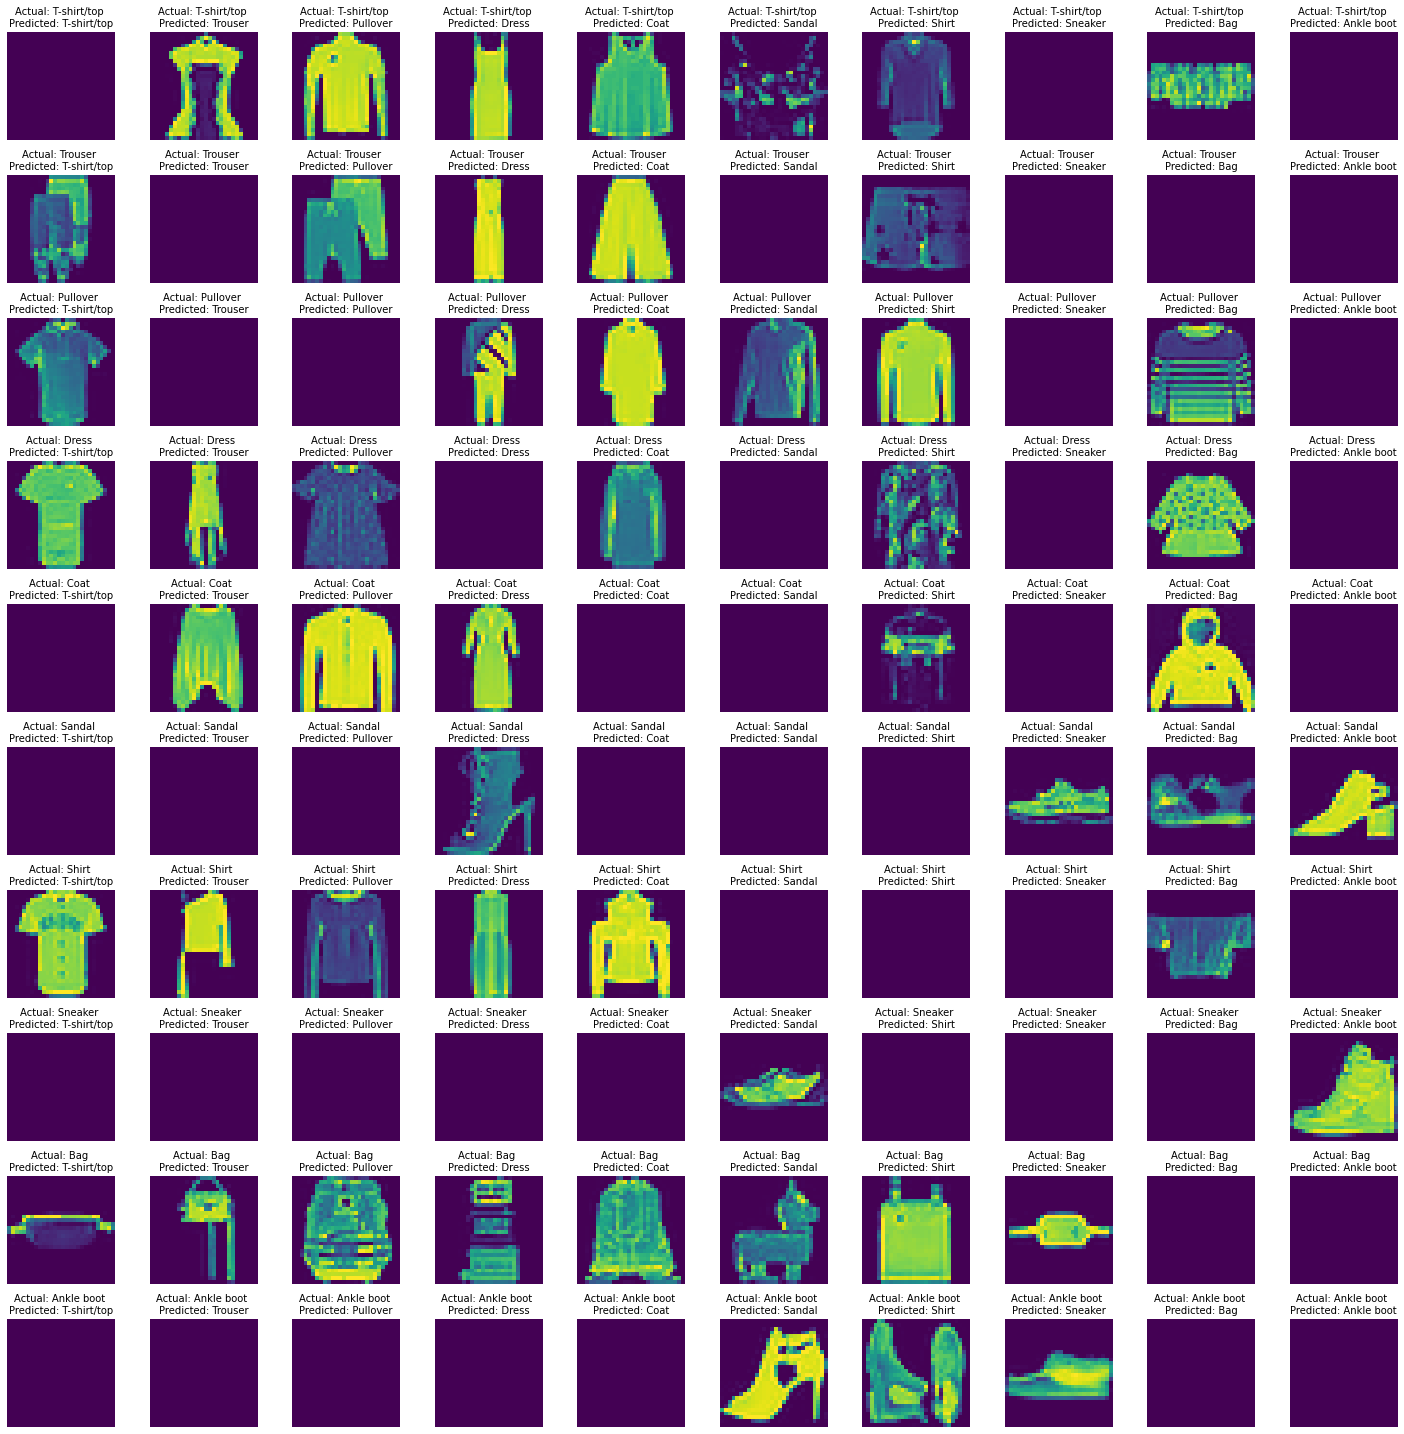

In [179]:
# Image grid for highest cross-entropy for an image of i that was mistakenly identified as j
fig, axes = plt.subplots(10, 10, figsize=(20,20))
grid(highest_cross_entropy_img_list, fig)


for i in range(10):
  for ax, label in zip(axes[i], CLASSES):
    title = f"Actual: {CLASSES[i]} \nPredicted: {label}"
    ax.set_title(title, fontsize = 10)
fig.tight_layout(pad = 1)
plt.show()

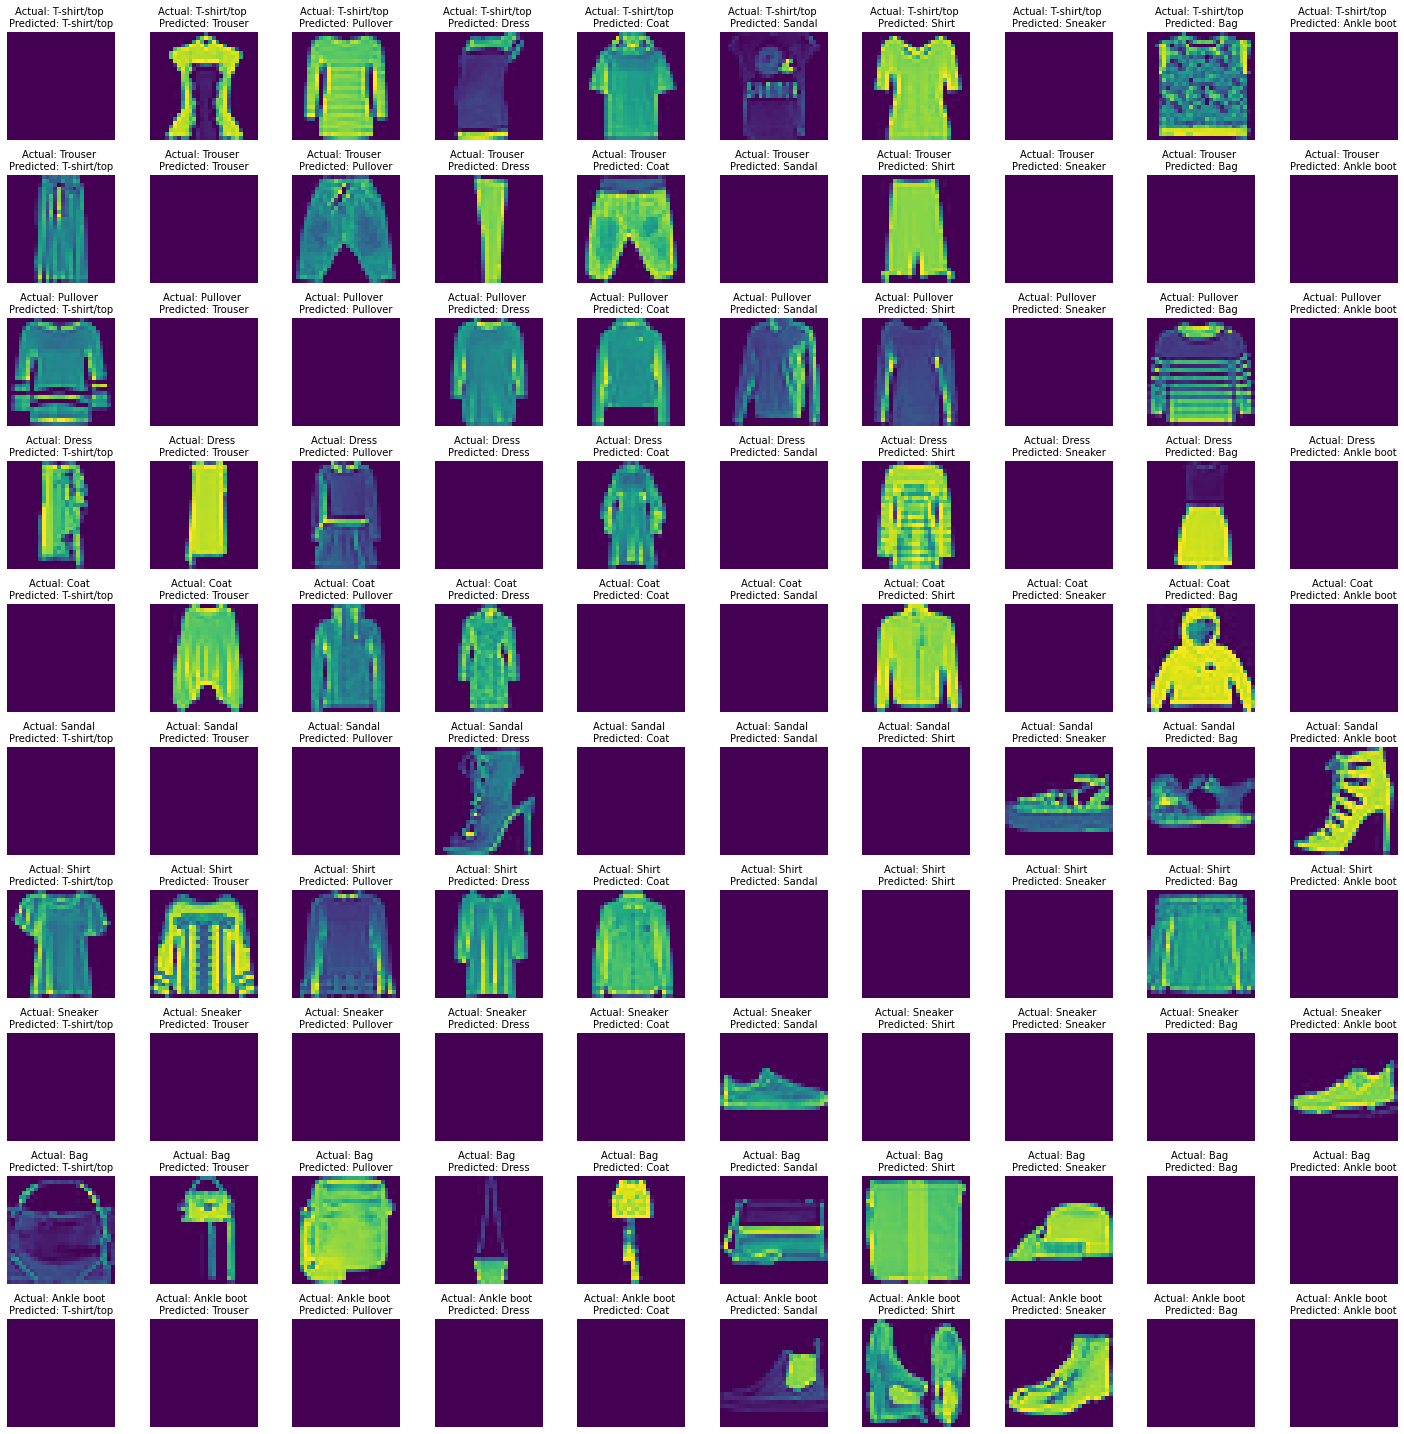

In [181]:
# Image grid for lowest cross-entropy for an image of i that was mistakenly identified as j
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
grid(lowest_cross_entropy_img_list, fig)

for i in range(10):
  for ax, label in zip(axes[i], CLASSES):
    title = f"Actual: {CLASSES[i]} \nPredicted: {label}"
    ax.set_title(title, fontsize = 10)
fig.tight_layout(pad = 1)
plt.show()

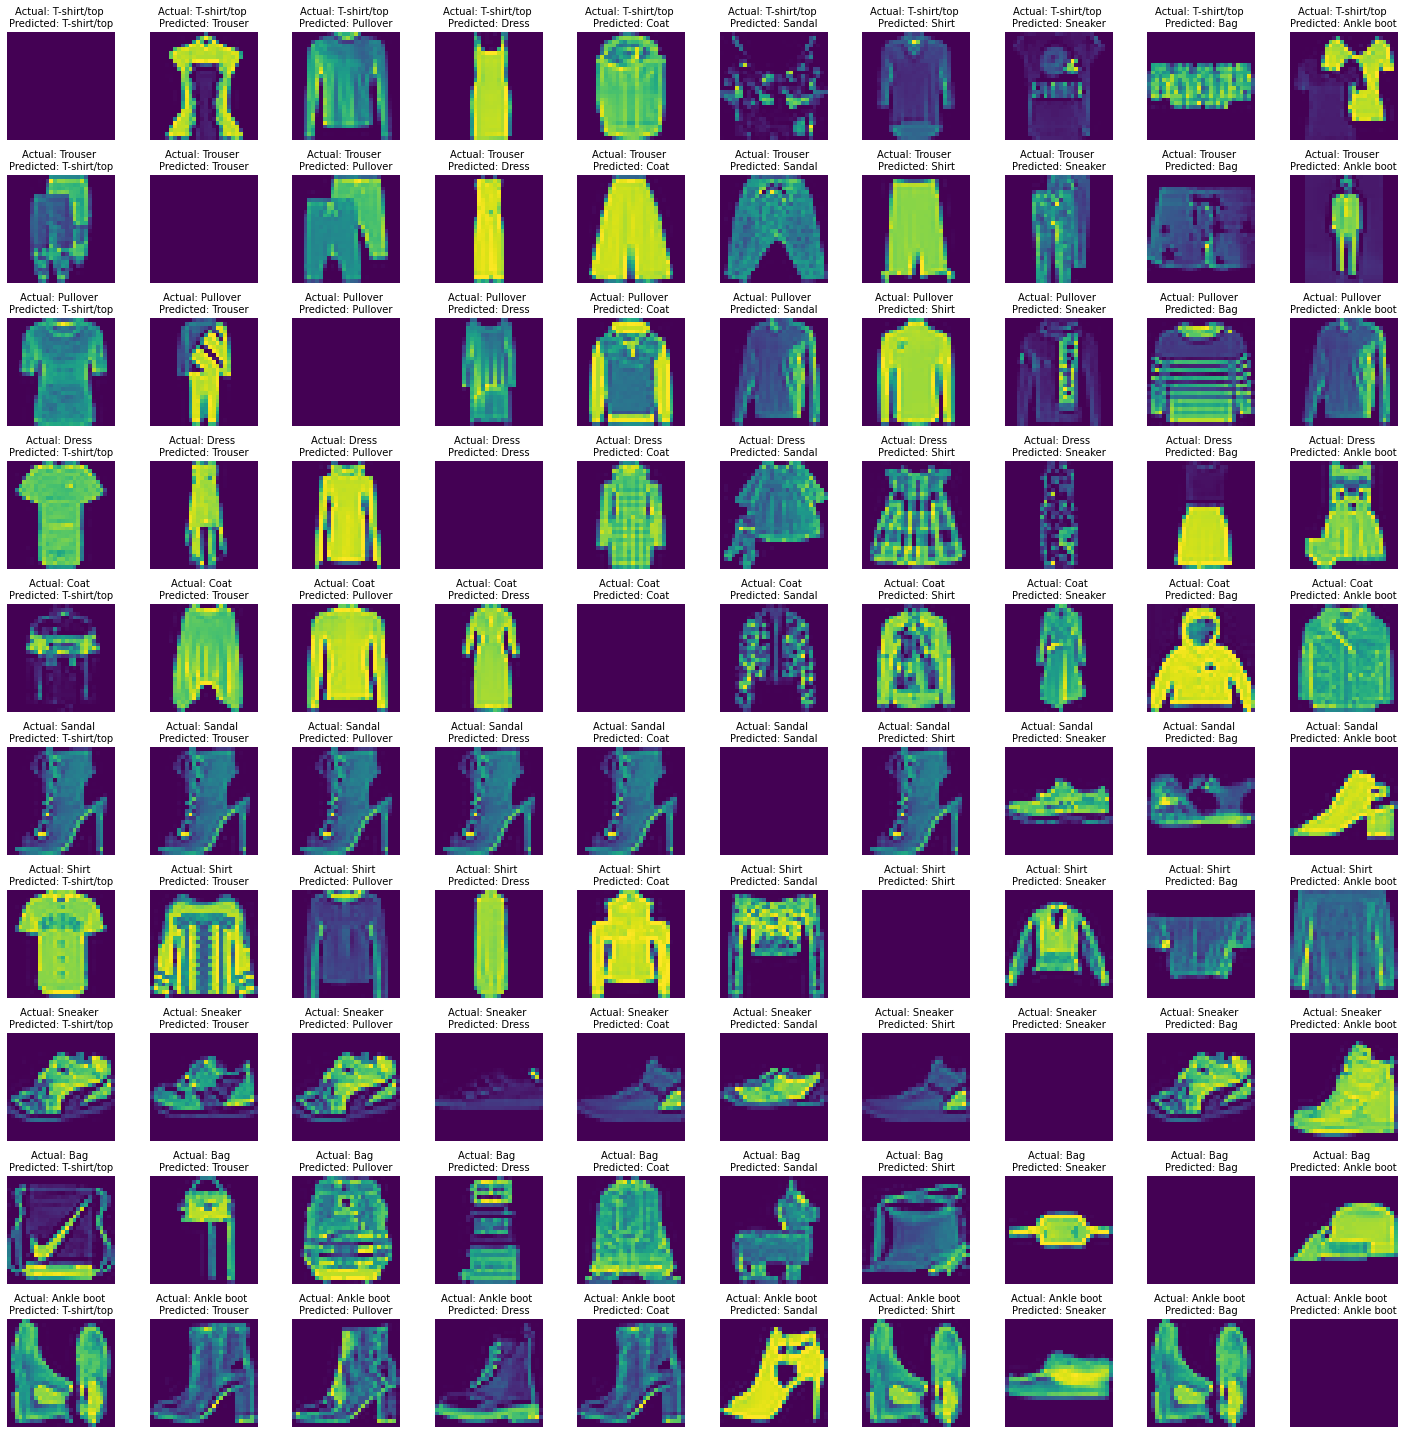

In [182]:
# Image grid for highest probability for an image of i to be mistakenly identified as j
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
grid(highest_probability_img_list, fig)

for i in range(10):
  for ax, label in zip(axes[i], CLASSES):
    title = f"Actual: {CLASSES[i]} \nPredicted: {label}"
    ax.set_title(title, fontsize = 10)
fig.tight_layout(pad = 1)
plt.show()

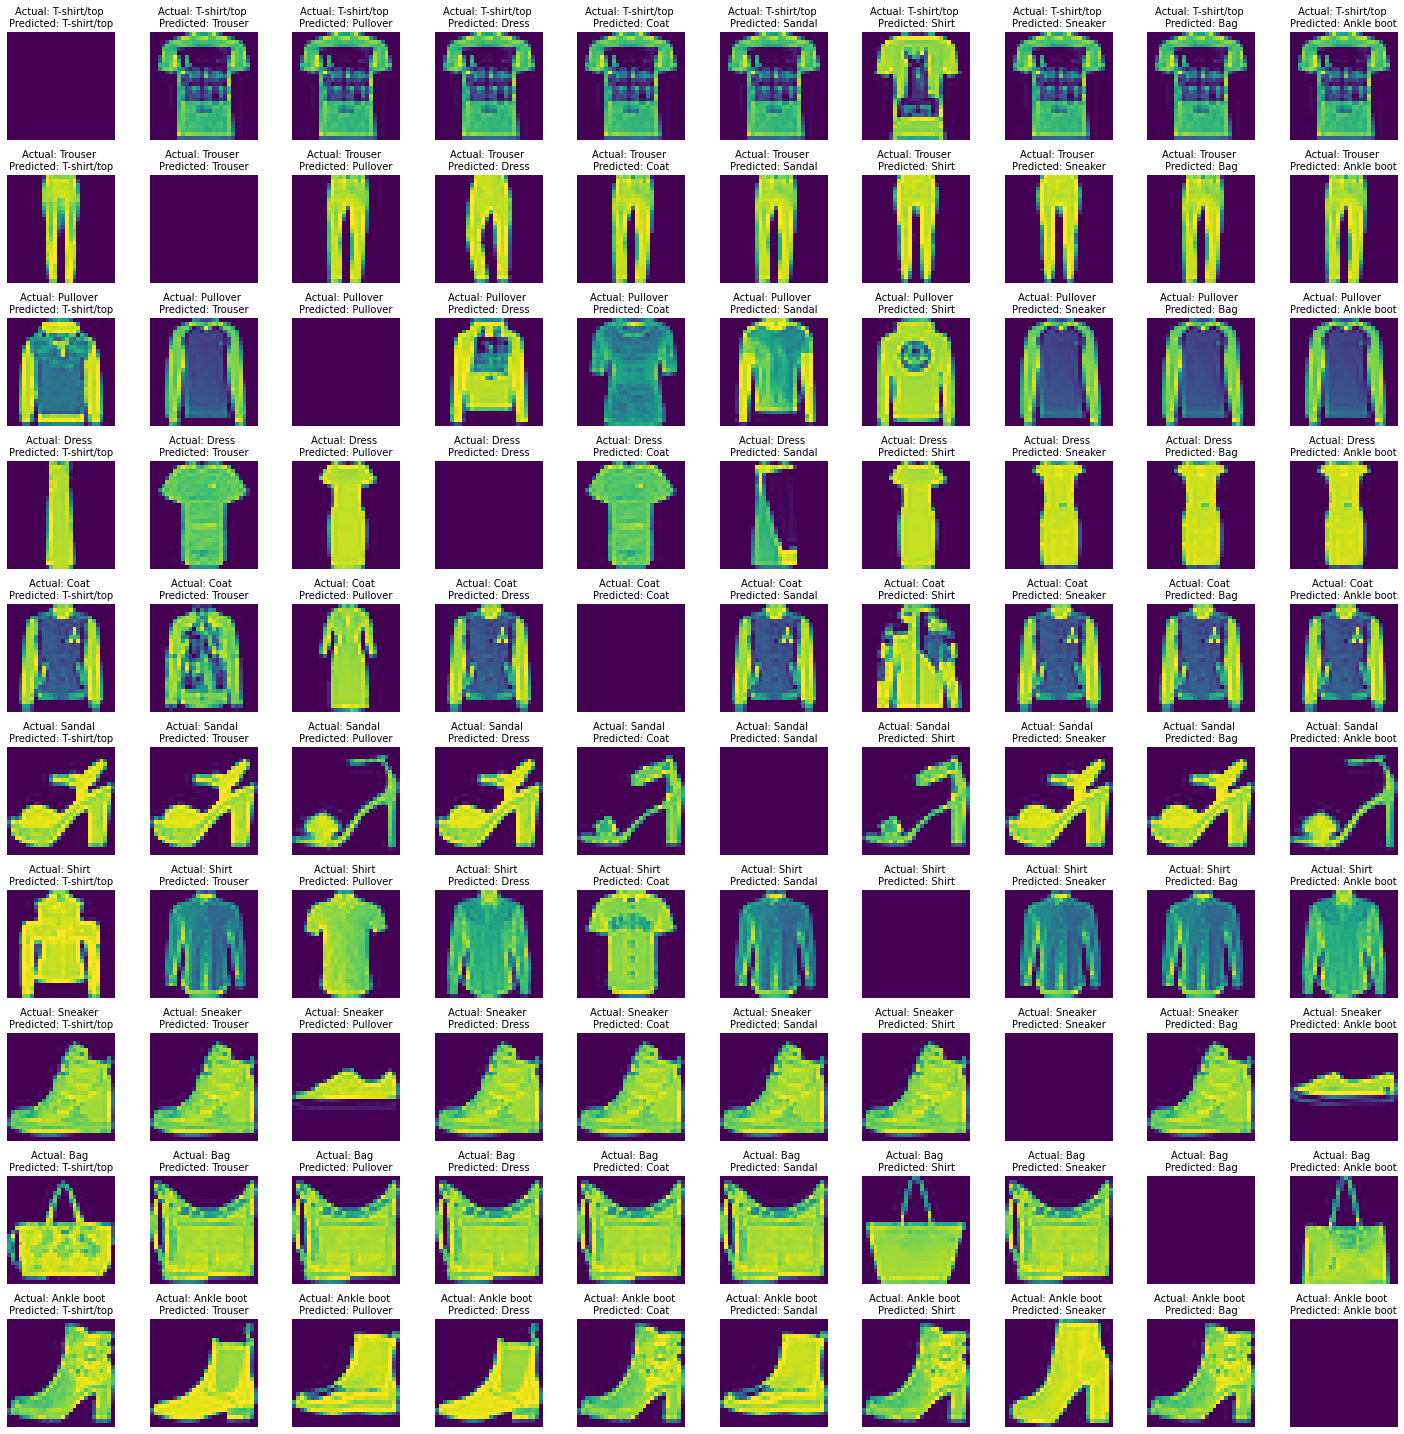

In [184]:
# Image grid for lowest probability for an image of i to be mistakenly identified as j
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
grid(lowest_probability_img_list, fig)

for i in range(10):
  for ax, label in zip(axes[i], CLASSES):
    title = f"Actual: {CLASSES[i]} \nPredicted: {label}"
    ax.set_title(title, fontsize = 10)
fig.tight_layout(pad = 1)
plt.show()

### 4.

We use the architecture and weights of a neural network trained on a large data set as initialization values for retraining the same network on a much smaller data set of a similar nature. This approach is known as **transfer learning**.

Load the **MNIST handwritten digit data** (`keras.datasets.mnist.load_data`), both training and testing sets.
For $n=100, 200, ...$, retrain your models A and B on a $n$ randomly selected training images and record the accuracy on the full test set.
How large does $n$ need to be to achieve 95% accuracy on the test set? Make sure you reload your weights between training runs!

For $n=100, 200, ...$, train models A and B from scratch (i.e., with random initializations) on a $n$ randomly selected training images and record the accuracy on the full test set.
How large does $n$ need to be to achieve 95% accuracy on the test set? Make sure you reinitialize your weights between training runs!

Comment on the effectiveness of transfer learning in the context of your computaitons.



In [0]:
# Training models A and B on the MNIST dataset after initial training on the fashion_MNIST dataset

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = (X_train/255.).astype(np.float32)
Y_train = np.zeros((60000, 10)).astype(np.float32)
Y_train[np.arange(60000), y_train] = 1

X_test = (X_test/255.).astype(np.float32)
Y_test = np.zeros((10000, 10)).astype(np.float32)
Y_test[np.arange(10000), y_test] = 1

In [0]:
modelA4_1 = modelA
modelA4_1.summary()
modelA4_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [0]:
modelA4_1 = load_model('modelA.h5')
modelA4_1.load_weights('modelA_weights.h5')
modelA4_1.summary()
modelA4_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [0]:
counter = 0

In [0]:
# Repeat this code cell until accuracy reaches 0.95

counter +=1
modelA4_1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test))
print(f"n = {counter*100*10}")

Epoch 1/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.9472 - val_loss: 0.1285 - val_accuracy: 0.9606
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.9487 - val_loss: 0.1269 - val_accuracy: 0.9605
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9496 - val_loss: 0.1259 - val_accuracy: 0.9612
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1737 - accuracy: 0.9488 - val_loss: 0.1251 - val_accuracy: 0.9614
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9494 - val_loss: 0.1242 - val_accuracy: 0.9619
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9495 - val_loss: 0.1234 - val_accuracy: 0.9630
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1666 - accuracy: 0.9515 - val_loss: 0.1222 - val_accuracy: 0.9627
Epoch 

In [0]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train/255.).astype(np.float32)
Y_train = np.zeros((60000, 10)).astype(np.float32)
Y_train[np.arange(60000), y_train] = 1

X_test = (X_test/255.).astype(np.float32)
Y_test = np.zeros((10000, 10)).astype(np.float32)
Y_test[np.arange(10000), y_test] = 1

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [0]:
modelB4_1 = modelB
modelB4_1.summary()
modelB4_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

In [0]:
modelB4_1 = load_model('modelB.h5')
modelB4_1.load_weights('modelB_weights.h5')
modelB4_1.summary()
modelB4_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [0]:
counter = 0

In [0]:
# Repeat this code cell until accuracy reaches 0.95

counter +=1
modelB4_1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test))
print(f"n = {counter*100*10}")

Epoch 1/10
100/100 [==============================] - 7s 70ms/step - loss: 0.2012 - accuracy: 0.9478 - val_loss: 0.0870 - val_accuracy: 0.9783
Epoch 2/10
100/100 [==============================] - 7s 70ms/step - loss: 0.1877 - accuracy: 0.9517 - val_loss: 0.0915 - val_accuracy: 0.9794
Epoch 3/10
100/100 [==============================] - 7s 71ms/step - loss: 0.1785 - accuracy: 0.9533 - val_loss: 0.0790 - val_accuracy: 0.9816
Epoch 4/10
100/100 [==============================] - 7s 71ms/step - loss: 0.1686 - accuracy: 0.9562 - val_loss: 0.0791 - val_accuracy: 0.9812
Epoch 5/10
100/100 [==============================] - 7s 72ms/step - loss: 0.1633 - accuracy: 0.9573 - val_loss: 0.0817 - val_accuracy: 0.9815
Epoch 6/10
100/100 [==============================] - 7s 72ms/step - loss: 0.1542 - accuracy: 0.9609 - val_loss: 0.0703 - val_accuracy: 0.9839
Epoch 7/10
100/100 [==============================] - 7s 71ms/step - loss: 0.1492 - accuracy: 0.9614 - val_loss: 0.0711 - val_accuracy: 0.9827

Via Transfer learning, model A requires about 6000 samples to reach 95% accuracy. Conversely, model B only requires about 1000 samples to reach 95% accuracy.

In [0]:
# Training models A and B on the MNIST dataset from scratch

In [0]:
# Model A

modelA4_2 = Sequential([Input((28, 28)),
                    Flatten(),
                    Dense(256, activation="relu"),
                    Dropout(0.2),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")])
modelA4_2.summary()
modelA4_2.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = (X_train/255.).astype(np.float32)
Y_train = np.zeros((60000, 10)).astype(np.float32)
Y_train[np.arange(60000), y_train] = 1

X_test = (X_test/255.).astype(np.float32)
Y_test = np.zeros((10000, 10)).astype(np.float32)
Y_test[np.arange(10000), y_test] = 1

In [0]:
counter = 0

In [0]:
# Repeat this code cell until accuracy reaches 0.95

counter +=1
modelA4_2.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test))
print(f"n = {counter*100*10}")

Epoch 1/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.9475 - val_loss: 0.1353 - val_accuracy: 0.9602
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1814 - accuracy: 0.9468 - val_loss: 0.1350 - val_accuracy: 0.9606
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1805 - accuracy: 0.9477 - val_loss: 0.1338 - val_accuracy: 0.9605
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1793 - accuracy: 0.9484 - val_loss: 0.1333 - val_accuracy: 0.9613
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1759 - accuracy: 0.9490 - val_loss: 0.1321 - val_accuracy: 0.9609
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9490 - val_loss: 0.1313 - val_accuracy: 0.9612
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1738 - accuracy: 0.9498 - val_loss: 0.1308 - val_accuracy: 0.9616
Epoch 

In [0]:
# Model B

modelB4_2 = Sequential()
modelB4_2.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1))) # zero-padding
modelB4_2.add(MaxPooling2D(2))
modelB4_2.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modelB4_2.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modelB4_2.add(MaxPooling2D(2))
modelB4_2.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modelB4_2.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modelB4_2.add(MaxPooling2D(2))
modelB4_2.add(Flatten())
modelB4_2.add(Dense(128, activation="relu"))
modelB4_2.add(Dropout(0.5))
modelB4_2.add(Dense(64, activation="relu"))
modelB4_2.add(Dropout(0.5))
modelB4_2.add(Dense(10, activation="softmax"))
modelB4_2.summary()
modelB4_2.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)        

In [0]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train/255.).astype(np.float32)
Y_train = np.zeros((60000, 10)).astype(np.float32)
Y_train[np.arange(60000), y_train] = 1

X_test = (X_test/255.).astype(np.float32)
Y_test = np.zeros((10000, 10)).astype(np.float32)
Y_test[np.arange(10000), y_test] = 1

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [0]:
counter = 0

In [0]:
# Repeat this code cell until accuracy reaches 0.95

counter +=1
modelB4_2.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test))
print(f"n = {counter*100*10}")

Epoch 1/10
100/100 [==============================] - 7s 70ms/step - loss: 0.2432 - accuracy: 0.9312 - val_loss: 0.1027 - val_accuracy: 0.9714
Epoch 2/10
100/100 [==============================] - 7s 71ms/step - loss: 0.2327 - accuracy: 0.9338 - val_loss: 0.0904 - val_accuracy: 0.9751
Epoch 3/10
100/100 [==============================] - 7s 71ms/step - loss: 0.2224 - accuracy: 0.9387 - val_loss: 0.0876 - val_accuracy: 0.9763
Epoch 4/10
100/100 [==============================] - 7s 71ms/step - loss: 0.2124 - accuracy: 0.9404 - val_loss: 0.0856 - val_accuracy: 0.9746
Epoch 5/10
100/100 [==============================] - 7s 71ms/step - loss: 0.2082 - accuracy: 0.9417 - val_loss: 0.0861 - val_accuracy: 0.9765
Epoch 6/10
100/100 [==============================] - 7s 71ms/step - loss: 0.1987 - accuracy: 0.9460 - val_loss: 0.0779 - val_accuracy: 0.9775
Epoch 7/10
100/100 [==============================] - 7s 71ms/step - loss: 0.1902 - accuracy: 0.9475 - val_loss: 0.0747 - val_accuracy: 0.9786

Starting from scratch, model A requires about 9000 samples before reaching 95% accuracy. Conversely, model B only required about 3000 samples before reaching 95% accuracy.